In [2]:
path='/mnt/ufs18/nodr/home/jieyaqi/east_africa/tomoI3/curve'

In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
station = os.listdir(path)
station.remove('phase.dat')

In [4]:
def remove_repeat(period,vel):
    period = list(period)
    vel = list(vel)
    period_1 = sorted(set(period),key=list(period).index)
    index = []
    for per in period_1:
        index.append(period.index(per))
    vel_1 = []
    for i in index:
        vel_1.append(vel[i])
    return np.array(period_1),np.array(vel_1)

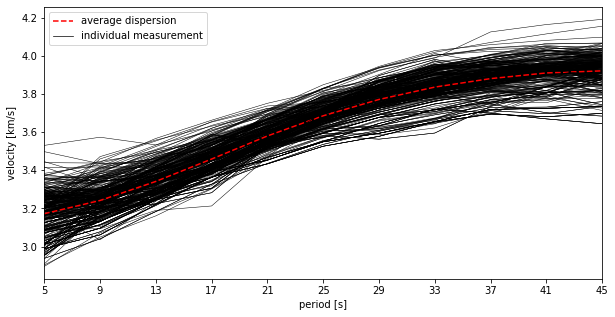

In [7]:
font1 = {'size': 23}
plt.figure(figsize=(10,5))
velsum = np.zeros(11)
num = 0
for sta in station:
    period, vel = np.loadtxt(path+'/'+sta,unpack=True,usecols=(3,4))
    if len(period)>len(set(period)):
        period,vel = remove_repeat(period,vel)
    velsum = velsum + vel
    num = num + 1
    plt.plot(period,vel,'k-',linewidth=0.5)
avg = velsum/len(station)
plt.plot(period,avg,'r--',label='average dispersion')
plt.plot(period,vel,'k-',linewidth=0.7,label='individual measurement')
plt.xticks(period,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('period [s]',fontsize=10)
plt.ylabel('velocity [km/s]',fontsize=10)
plt.xlim([5,45])
plt.legend()
plt.savefig('/mnt/home/jieyaqi/Documents/plot/dispersion.pdf')
plt.show()

In [25]:
print(num)

353


In [8]:
per,vel=np.loadtxt('/mnt/home/jieyaqi/code/JOINT_PACKAGE/velocity.dat',unpack=True)

In [11]:
x=np.arange(2,100+1,2)

In [13]:
y=np.interp(x,per,vel)

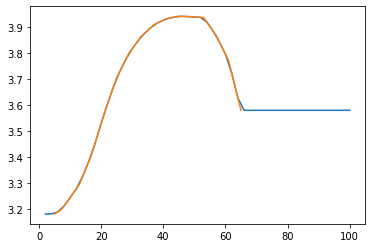

In [15]:
plt.plot(x,y)
plt.plot(per,vel)

In [17]:
np.savetxt('/mnt/home/jieyaqi/code/JOINT_PACKAGE/myref_vel.dat', np.column_stack((x,y)), fmt='%.6f')

In [27]:
par,res=np.loadtxt('/mnt/home/jieyaqi/code/JOINT_PACKAGE/Shell_code/L_curve.dat',unpack=True,usecols=(0,2))

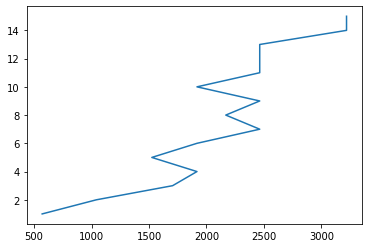

In [29]:
plt.plot(res,par)

In [6]:
import numpy as np

In [7]:
per,vel=np.loadtxt('/mnt/home/jieyaqi/code/JOINT_PACKAGE/velocity.dat', unpack=True)

In [8]:
perlist=list(range(6,47,2))
vellist=np.interp(perlist,per,vel)
np.round(vellist,6)

array([3.2152  , 3.235685, 3.27296 , 3.31584 , 3.37012 , 3.4358  ,
       3.502142, 3.569148, 3.629722, 3.683868, 3.729938, 3.767932,
       3.802375, 3.833265, 3.859338, 3.880592, 3.89805 , 3.91171 ,
       3.92302 , 3.93198 , 3.935262])

In [9]:
per

array([ 5.,  7.,  9., 13., 17., 21., 25., 29., 33., 37., 41., 45., 49.,
       53., 57., 61., 65.])

In [10]:
np.savetxt('/mnt/home/jieyaqi/code/JOINT_PACKAGE/myref_vel.dat',np.column_stack((perlist,vellist)),fmt="%.7s")

In [27]:
?np.column_stack

In [30]:
np.column_stack((perlist,vel))

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [11]:
import obspy
import matplotlib.pyplot as plt

In [12]:
tr = obspy.read("/mnt/ufs18/nodr/home/jieyaqi/east_africa/threestation_tt/I2/COR_XJ.PR63.XJ.PR12.TT.SAC")

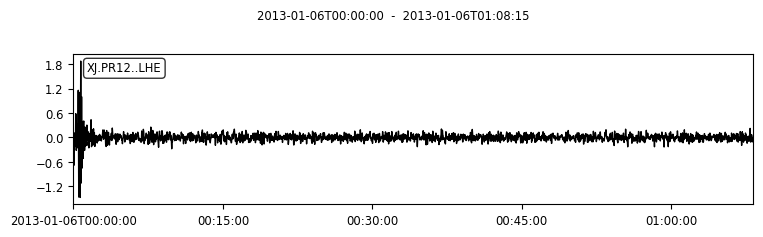

(0, 300)

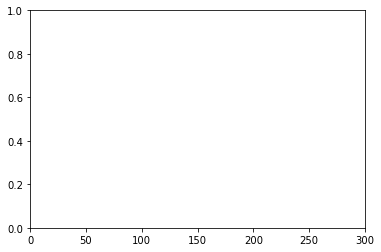

In [14]:
tr.plot()
plt.xlim(0,300)

In [7]:
tr2 = obspy.read("/mnt/ufs18/nodr/home/jieyaqi/east_africa/all_obs_debias/COR_XJ.PR63.XJ.PR12.ZZ.SAC")

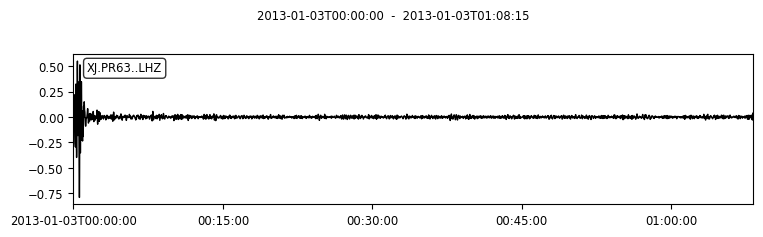

In [8]:
tr2.plot()